In [10]:
#Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"]=(10,6)

In [11]:
#Loading the dataset
data = pd.read_csv("data.csv")
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


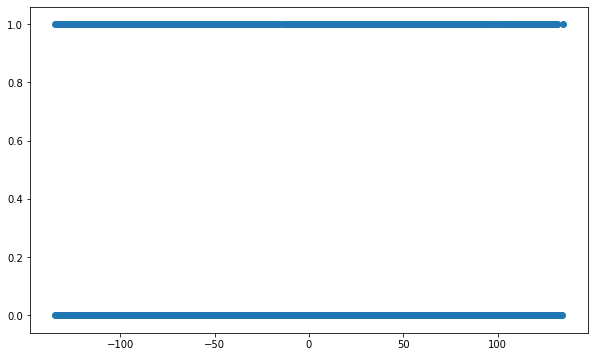

In [28]:
#Visualizng the dataset
plt.scatter(data['x1'],data['y'])
plt.show()

#Divide the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(data['x1'],data['y'])

In [24]:
#Function to normalize the data

def normalize(X):
    return X - X.mean()

#Method to make predictions
def predict(X,b0,b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
#Logistic Regression
def logistic_regression(X,Y):
    
    X = normalize(X)
    b0 = 0
    b1 = 0
    l = 0.001
    epochs = 300
    
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1-y_pred))
        b0 = b0 - l * D_b0
        b1 = b1 - l * D_b1
    return b0, b1

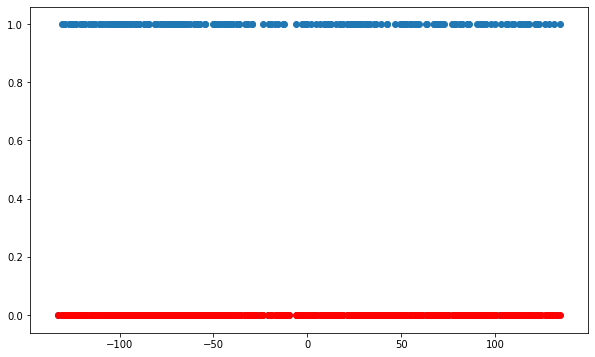

Accuracy = 0.0
Accuracy = 0.0
Accuracy = 0.0017953321364452424
Accuracy = 0.003590664272890485
Accuracy = 0.005385996409335727
Accuracy = 0.005385996409335727
Accuracy = 0.00718132854578097
Accuracy = 0.00718132854578097
Accuracy = 0.008976660682226212
Accuracy = 0.008976660682226212
Accuracy = 0.010771992818671455
Accuracy = 0.012567324955116697
Accuracy = 0.01436265709156194
Accuracy = 0.01615798922800718
Accuracy = 0.01615798922800718
Accuracy = 0.017953321364452424
Accuracy = 0.019748653500897665
Accuracy = 0.02154398563734291
Accuracy = 0.02333931777378815
Accuracy = 0.02333931777378815
Accuracy = 0.025134649910233394
Accuracy = 0.026929982046678635
Accuracy = 0.02872531418312388
Accuracy = 0.02872531418312388
Accuracy = 0.02872531418312388
Accuracy = 0.03052064631956912
Accuracy = 0.03231597845601436
Accuracy = 0.03411131059245961
Accuracy = 0.03590664272890485
Accuracy = 0.03770197486535009
Accuracy = 0.03770197486535009
Accuracy = 0.03770197486535009
Accuracy = 0.03949730700179

In [29]:
#Training the model
b0, b1 = logistic_regression(x_train,y_train)

#Making Predictions
x_test_norm = normalize(x_test)
y_pred = predict(x_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred, c="red")
plt.show()

#The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
    print(f"Accuracy = {accuracy / len(y_pred)}")

In [27]:
#Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

y_pred_sk = lr_model.predict(x_test.values.reshape(-1,1))
plt.clf()
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_sk,c="green")
plt.show()

#Accuracy
print(f"Accuracy = {lr_model.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1))}")


C:\Users\Sweet Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').